# Dataset과 DataLoader

In [81]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,    # download=True 는 root 에 데이터가 없는 경우 인터넷에서 다운로드
    transform=ToTensor()   # transform 과 target_transform 은 특징(feature)과 정답(label) 변형(transform)을 지정
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [82]:
training_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [134]:
#파일에서 사용자 정의 데이터셋 만들기  (Dacon mninst data)

import os
import pandas as pd
from torchvision.io import read_image
from PIL import Image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'], header = 0 ) ## header = 0 : header column 무시
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
#         img_path = self.img_dir +r'\\'+ self.img_labels.iloc[idx, 0]
#         image = read_image(img_path)
        image = Image.open(img_path)
        plt.plot(image)
        plt.show()
#         ‪D:\대회\Mnist 손글씨 분류 경진대회\Mnist Number\dataset\train\train0004.png
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [135]:
file = r'D:\대회\Mnist 손글씨 분류 경진대회\Mnist Number\dataset\train\train_data.csv'
img_dir = r"D:\대회\Mnist 손글씨 분류 경진대회\Mnist Number\dataset\train"

train_dataset = CustomImageDataset(file, img_dir )  # Dataset 클래스 선언





dataloader = DataLoader(dataset, batch_size=200, shuffle=True, drop_last=True)



print(dataset.__len__())
print(dataset.__getitem__(4))


# for batch_idx, samples in dataloader:
#     print(batch_idx, samples)

5000
D:\대회\Mnist 손글씨 분류 경진대회\Mnist Number\dataset\train\train0005.png
(tensor([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           94, 225, 137,  26,   0,   0,   0,

In [94]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
from torch.utils.data import TensorDataset, DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(device,'로 적용됩니다')

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
    
    
learning_rate = 0.01
training_epochs = 150
batch_size = 100


data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

TypeError: img should be PIL Image. Got <class '__main__.CustomImageDataset'>

In [47]:
str(2)

'2'

# Transform (Data Augmetation)

In [ ]:
#파일에서 사용자 정의 데이터셋 만들기  (Dacon mninst data)

import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file, names=['file_name', 'label'], header = 0 ) ## header = 0 : header column 무시
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
#         img_path = self.img_dir +r'\\'+ self.img_labels.iloc[idx, 0]
        print
        print(str(img_path))
        image = read_image(img_path)
#         ‪D:\대회\Mnist 손글씨 분류 경진대회\Mnist Number\dataset\train\train0004.png
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [110]:
file = r'D:\대회\Mnist 손글씨 분류 경진대회\Mnist Number\dataset\train\train_data.csv'
img_dir = r"D:\대회\Mnist 손글씨 분류 경진대회\Mnist Number\dataset\train"

dataset = CustomImageDataset(file, img_dir )  # Dataset 클래스 선언
dataloader = DataLoader(dataset, batch_size=200, shuffle=True, drop_last=True)



print(dataset.__len__())
print(dataset.__getitem__(4))
print(dataset.__getitem__(4)[0].shape)

print(type(dataset))


# for batch_idx, samples in dataloader:
#     print(batch_idx, samples)

5000
D:\대회\Mnist 손글씨 분류 경진대회\Mnist Number\dataset\train\train0005.png
(tensor([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
            0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
         [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           94, 225, 137,  26,   0,   0,   0,

In [98]:
import numpy as np

a= np.random.randint(-40,40)

a

8

In [ ]:
class data_augmentation(tensor):
    
    
    
    
    def dataset_rotation (path):
        
        r = np.random.randint(-40,40)
        rotation30 = transforms.RandomRotation(r)
        image = Image.open(path)
        image = rotation(image)
        image_array = np.array(image).reshape(28,28)
#         image_array = cv2.bilateralFilter(image_array, -1, 10, 5)
        image_array = np.array(image_array).reshape(1, 28,28)#.reshape(784)
        return image_array

#     def dataset_rotation40 (path):

#         rotation30 = transforms.RandomRotation(30)
#         image = Image.open(path)
#         image = rotation30(image)
#         image_array = np.array(image).reshape(28,28)
#         image_array = cv2.bilateralFilter(image_array, -1, 10, 5)
#         image_array = np.array(image_array).reshape(28,28,1)#.reshape(784)
#         return image_array


    def dataset_crop (path):

        crop = transforms.CenterCrop(12)
        image = Image.open(path)
        image = crop(image)
        image_array = np.array(image).reshape(28,28)
        image_array = cv2.bilateralFilter(image_array, -1, 10, 5)
        image_array = np.array(image_array).reshape(1, 28,28)#.reshape(784)
        return image_array


    def dataset_erase (path):

        erase = transforms.Compose([transforms.PILToTensor(),transforms.RandomErasing(0.5),transforms.ToPILImage() ])
        image = Image.open(path)
        image = erase(image)
        image_array = np.array(image).reshape(28,28)
        image_array = cv2.bilateralFilter(image_array, -1, 10, 5)
        image_array = np.array(image_array).reshape(1, 28,28)#.reshape(784)
        return image_array



In [1]:
# Data 불러오기

import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [8]:
ds

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
Target transform: Lambda()

In [10]:
ds.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
           0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,
         102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [1]:
import numpy as np
import pandas as pd
import sys
import cv2

import torch
import torch.nn.functional as F
import torch.nn.init
from torchvision import transforms
from torch.utils.data import Dataset  
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset, DataLoader
import torchvision.datasets as dsets
import torchvision.transforms as transforms

from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from copy import deepcopy  # 학습동안의 best model의 파라미터값들을 copy해서 저장하기 위함

# np.set_printoptions(threshold=sys.maxsize)
# pd.set_option('display.max_rows', None)

In [2]:


# train_df = pd.read_csv(r'D:\대회\Mnist 손글씨 분류 경진대회\dataset\train\train_data.csv')
# train_dir = r'D:\대회\Mnist 손글씨 분류 경진대회\dataset\train\\'
train_df = pd.read_csv(r'D:\대회\Mnist 손글씨 분류 경진대회\Mnist Number\dataset\train\train_data.csv')
train_dir = r'D:\대회\Mnist 손글씨 분류 경진대회\Mnist Number\dataset\train\\'
train_file_path = train_dir + train_df['file_name']

    
def dataset_raw (path):
    
    image = Image.open(path) 
    image_array = np.array(image).reshape(28,28)
    image_array = cv2.bilateralFilter(image_array, -1, 10, 5)
    image_array = np.array(image_array).reshape(1,28,28)#.reshape(784)
    return image_array

def dataset_rotation (path):
    
#     r = np.random.randint(0,40)
    rotation = transforms.RandomRotation((-40,40))
    image = Image.open(path)
    image = rotation(image)
    image_array = np.array(image).reshape(28,28)
    image_array = cv2.bilateralFilter(image_array, -1, 10, 5)
    image_array = np.array(image_array).reshape(1,28,28)#.reshape(784)
    return image_array  

    
# def dataset_rotation30 (path):
    
#     rotation30 = transforms.RandomRotation(30)
#     image = Image.open(path)
#     image = rotation30(image)
#     image_array = np.array(image).reshape(28,28)
#     image_array = cv2.bilateralFilter(image_array, -1, 10, 5)
#     image_array = np.array(image_array).reshape(28,28)#.reshape(784)
#     return image_array

# def dataset_rotation40 (path):
    
#     rotation30 = transforms.RandomRotation(30)
#     image = Image.open(path)
#     image = rotation30(image)
#     image_array = np.array(image).reshape(28,28)
#     image_array = cv2.bilateralFilter(image_array, -1, 10, 5)
    image_array = np.array(image_array).reshape(1,28,28)#.reshape(784)
#     return image_array


def dataset_crop (path):
    
    crop = transforms.CenterCrop(12)
    image = Image.open(path)
    image = crop(image)
    image_array = np.array(image).reshape(28,28)
    image_array = cv2.bilateralFilter(image_array, -1, 10, 5)
    image_array = np.array(image_array).reshape(1,28,28)#.reshape(784)
    return image_array


def dataset_erase (path):
    
    erase = transforms.Compose([transforms.PILToTensor(),transforms.RandomErasing(0.5),transforms.ToPILImage() ])
    image = Image.open(path)
    image = erase(image)
    image_array = np.array(image).reshape(28,28)
    image_array = cv2.bilateralFilter(image_array, -1, 10, 5)
    image_array = np.array(image_array).reshape(1,28,28)#.reshape(784)
    return image_array

# train_label = np.array(pd.get_dummies(train_df['label']))
train_label = np.array(train_df['label'])
print(len(train_label))

train_data_raw = np.array(list(train_file_path.apply(dataset_raw)), dtype='float32')
train_data_r1 = np.array(list(train_file_path.apply(dataset_rotation)), dtype='float32')
train_data_r2 = np.array(list(train_file_path.apply(dataset_rotation)), dtype='float32')
# train_data_r30 = np.array(list(train_file_path.apply(dataset_rotation30)), dtype='float32')
# train_data_r40 = np.array(list(train_file_path.apply(dataset_rotation40)), dtype='float32')
# train_data_crop = np.array(list(train_file_path.apply(dataset_crop)), dtype='float32')
train_data_erase = np.array(list(train_file_path.apply(dataset_erase)), dtype='float32')


train_data = np.vstack([train_data_raw, train_data_r1, train_data_r2, train_data_erase]) 
train_label = np.hstack([train_label, train_label, train_label, train_label]) 
print(len(train_label))





5000
20000


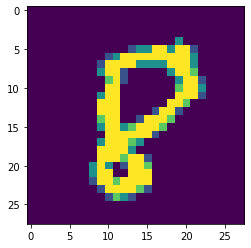

In [3]:
plt.imshow(train_data_r1[1][0])

In [4]:
x_train, x_val, y_train, y_val = train_test_split(train_data, train_label, test_size = 1/10, random_state=0)



In [5]:
print(x_train.shape)
print(y_train.reshape(-1,1,1,1).shape)

(18000, 1, 28, 28)
(18000, 1, 1, 1)


In [9]:
### 데이콘에서 베이스라인으로 준 코드 ###   (미사용)


class CustomDataset(Dataset):
    
    def __init__(self, file_path_list, labels = None): 
        self.file_path_list = file_path_list
        self.labels = labels
        self.random_choice = transforms.RandomChoice([transforms.RandomRotation((0,40)),
                                                      transforms.RandomVerticalFlip(0.5),
                                                      transforms.RandomHorizontalFlip(0.5)])
        self.transform = transforms.Compose([
#             transforms.Resize(224),
            self.random_choice,
            transforms.PILToTensor(),
        ])
        
    def __getitem__(self, idx):       
        image = Image.open(self.file_path_list[idx]) # 해당 인덱스에 맞는 image 추출
        tensor_image = self.transform(image) # PIL로 읽은 이미지를 torch tensor형으로 변환
        print(tensor_image.shape)
        flattened_image = tensor_image.float() # 2차원 이미지를 1차원으로 변환
        print(flattened_image.shape)
        
        if self.labels is not None: # 라벨이 존재 하는경우: 학습에 이용할경우

            label = self.labels[idx] # 해당 인덱스에 맞는 라벨 추출
            print(label.shape, self.labels[idx])
            return flattened_image, label  # 1차원으로 변환한 이미지와 라벨을 return

        return flattened_image # test단계에선 label이 존재하지 않기때문에 image만을 return
        
        
    def __len__(self):
        return len(self.file_path_list)

train_df = pd.read_csv(r'D:\대회\Mnist 손글씨 분류 경진대회\Mnist Number\dataset\train\train_data.csv')
train_dir = r'D:\대회\Mnist 손글씨 분류 경진대회\Mnist Number\dataset\train\\'
train_file_path = train_dir + train_df['file_name']



train_file_path =  train_dir + train_df['file_name']  
labels = train_df['label']
dataset = CustomDataset(train_file_path, labels)
data_loader = DataLoader(dataset, batch_size = 64, shuffle=True)

dataset.__getitem__(1)


# for data, label in data_loader:
#     print(data, label)

torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
() 8


(tensor([[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  64., 191.,
           128.,  64.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0.,   0.],
          [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  64., 255., 255.,
           255., 255., 191.,  64.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
             0.,   0.,   0.,   0.,   0

In [17]:
class CustomDataset(Dataset): 
    def __init__(self,x_data, y_data = None ):
        self.x_data = x_data
        self.y_data = y_data

  # 총 데이터의 개수를 리턴
    def __len__(self): 
        return len(self.x_data)

  # 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
    def __getitem__(self, idx): 
        x = torch.FloatTensor(self.x_data[idx])
        
        if self.y_data is not None: # 라벨이 존재 하는경우: 학습에 이용할경우

            y = self.y_data[idx] # 해당 인덱스에 맞는 라벨 추출

            return x, y  # 1차원으로 변환한 이미지와 라벨을 return

        return x # test단계에선 label이 존재하지 않기때문에 image만을 return
        

dataset = CustomDataset(x_train, y_train) 

# validset = CustomDataset(x_val, y_val)


# dataset =  TensorDataset(x_train, y_train)

data_loader = DataLoader(dataset, batch_size=20, shuffle=True, drop_last = True)

print(dataset.__len__())
print(dataset.__getitem__(1))
# print(dataset.__getitem__(1)[0].shape)

# print(x_train.shape)
# print(y_train.shape)

# print(len(x_train))
# print(len(y_train))


for data, label in data_loader:
    print(data, label)

18000
(tensor([[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.],
         [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
            0.,   0.,   0.,   0.,   0.,   0.]

          [0., 0., 0.,  ..., 0., 0., 0.]]]]) tensor([8, 4, 0, 4, 2, 2, 5, 1, 9, 4, 7, 7, 3, 7, 1, 7, 0, 3, 8, 6])
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0

          [0., 0., 0.,  ..., 0., 0., 0.]]]]) tensor([2, 0, 5, 7, 7, 2, 7, 4, 0, 8, 4, 5, 0, 4, 7, 4, 2, 7, 4, 3])
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0

          [0., 0., 0.,  ..., 0., 0., 0.]]]]) tensor([9, 9, 9, 9, 4, 1, 1, 7, 7, 5, 0, 0, 0, 7, 7, 3, 7, 8, 9, 0])
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0

          [0., 0., 0.,  ..., 0., 0., 0.]]]]) tensor([4, 3, 9, 7, 6, 0, 9, 0, 4, 5, 1, 0, 7, 4, 6, 5, 7, 3, 3, 4])
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0

          [0., 0., 0.,  ..., 0., 0., 0.]]]]) tensor([4, 5, 2, 1, 6, 5, 1, 8, 9, 0, 9, 6, 4, 4, 5, 0, 5, 7, 2, 8])
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0

          [0., 0., 0.,  ..., 0., 0., 0.]]]]) tensor([4, 4, 3, 0, 8, 0, 4, 8, 5, 0, 8, 4, 4, 6, 8, 3, 3, 0, 5, 8])
tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [21]:
validset

In [14]:
### 딥한 CNN으로 MNIST 분류   (Early Stop 적용 / Dropout / batchnorm)





device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(device,'로 적용됩니다')

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)
    
    
learning_rate = 0.01
training_epochs = 200
batch_size = 100
patience = 20  ## 얼리스탑 인자
trigger_n = 0
lowest_cost = np.inf


# mnist_train = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
#                           train=True, # True를 지정하면 훈련 데이터로 다운로드
#                           transform=transforms.ToTensor(), # 텐서로 변환
#                           download=True)
# 
# mnist_test = dsets.MNIST(root='MNIST_data/', # 다운로드 경로 지정
#                          train=False, # False를 지정하면 테스트 데이터로 다운로드
#                          transform=transforms.ToTensor(), # 텐서로 변환
#                          download=True)
# 
# data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
#                                           batch_size=batch_size,
#                                           shuffle=True,
#                                           drop_last=True)


# CNN 모델 클래스
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.keep_prob = 0.5
        
        # L1 ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(32),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        # L2 ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(64),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))
        
        # L3 ImgIn shape=(?, 7, 7, 64)
        #    Conv      ->(?, 7, 7, 128)
        #    Pool      ->(?, 4, 4, 128)
        self.layer3 = torch.nn.Sequential(
            torch.nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            torch.nn.BatchNorm2d(128),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=1))

        # L4 FC 4x4x128 inputs -> 625 outputs
        self.fc1 = torch.nn.Linear(4 * 4 * 128, 625, bias=True)
        torch.nn.init.kaiming_normal_( self.fc1.weight, a=0, mode='fan_in', nonlinearity='relu')
#         torch.nn.init.xavier_uniform_(self.fc1.weight)
        self.layer4 = torch.nn.Sequential(
            self.fc1,
            torch.nn.ReLU(),
            torch.nn.BatchNorm1d(625),
            torch.nn.Dropout(p=1 - self.keep_prob))
            
        
        # L5 Final FC 625 inputs -> 10 outputs
        self.fc2 = torch.nn.Linear(625, 10, bias=True)
        torch.nn.init.kaiming_normal_( self.fc2.weight, a=0, mode='fan_in', nonlinearity='relu')
#         torch.nn.init.kaiming_normal_(tensor, a=0, mode='fan_in', nonlinearity='leaky_relu')
        self.layer5 = torch.nn.Sequential(
                    self.fc2,
                    )

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.view(out.size(0), -1)   # Flatten them for FC
        out = self.layer4(out)
        out = self.layer5(out)
        return out

    
# CNN 모델 정의
model = CNN().to(device)
    
    
criterion = torch.nn.CrossEntropyLoss().to(device)    # 비용 함수에 소프트맥스 함수 포함되어져 있음.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


total_batch = len(data_loader)
print('총 배치의 수 : {}'.format(total_batch))


for epoch in range(training_epochs):
    avg_cost = 0
    
    model.train()

    for X, Y in data_loader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y는 레이블.
        # image is already size of (28x28), no reshape
        # label is not one-hot encoded

        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch
        
    ## Early stopping
    
    current_cost = avg_cost
    
    # best model check
    if current_cost < lowest_cost :
        best_epoch = epoch
        lowest_cost = current_cost
        best_model = deepcopy(model.state_dict())
        trigger_n = 0
        
    else:
        trigger_n += 1
        if trigger_n >= patience:
            print("There is no improvement during last %d epochs." % trigger_n)
            break
#     https://blog.naver.com/1012rnjsdydgns/222458085542 참고



    print('[Epoch: {:>4}] cost = {:>.9}, trigger_n: {}, best_epoch: {}'.format(epoch , avg_cost, trigger_n, best_epoch))    
  

  
# Load best epoch's model
model.load_state_dict(best_model)
  

cuda 로 적용됩니다
총 배치의 수 : 900
[Epoch:    0] cost = 0.458668828, trigger_n: 0, best_epoch: 0
[Epoch:    1] cost = 0.209676966, trigger_n: 0, best_epoch: 1
[Epoch:    2] cost = 0.187252715, trigger_n: 0, best_epoch: 2
[Epoch:    3] cost = 0.210768342, trigger_n: 1, best_epoch: 2
[Epoch:    4] cost = 0.15980421, trigger_n: 0, best_epoch: 4
[Epoch:    5] cost = 0.150235429, trigger_n: 0, best_epoch: 5
[Epoch:    6] cost = 0.223748177, trigger_n: 1, best_epoch: 5
[Epoch:    7] cost = 0.188768968, trigger_n: 2, best_epoch: 5
[Epoch:    8] cost = 0.148191139, trigger_n: 0, best_epoch: 8
[Epoch:    9] cost = 0.133665681, trigger_n: 0, best_epoch: 9
[Epoch:   10] cost = 0.141015992, trigger_n: 1, best_epoch: 9
[Epoch:   11] cost = 0.113906085, trigger_n: 0, best_epoch: 11
[Epoch:   12] cost = 0.106815204, trigger_n: 0, best_epoch: 12
[Epoch:   13] cost = 0.125135884, trigger_n: 1, best_epoch: 12
[Epoch:   14] cost = 0.117794245, trigger_n: 2, best_epoch: 12
[Epoch:   15] cost = 0.098779723, trigge

<All keys matched successfully>

In [23]:
### Valid (검증)


# 학습을 진행하지 않을 것이므로 torch.no_grad()
with torch.no_grad():
    
    model.eval()   ## 배치놈 인퍼런스 계산까지 포함됨 (평균, 편차, 감마, 베타 모두)
    
    X_val = torch.FloatTensor(x_val).view(len(x_val), 1, 28, 28).float().to(device)
    Y_val = torch.FloatTensor(y_val).to(device)

    prediction = model(X_val)
    correct_prediction = torch.argmax(prediction, 1) == Y_val
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())
    
    
# dropout 0.5,  Accuracy: 0.3294999897480011  
# 배치놈 & dropout 0.5 ,   Accuracy: 0.6342999935150146
# 배치놈 & dropout 0.5 , epoch=150   Accuracy: 0.6342999935150146
# 배치놈 & dropout 0.5 , epoch=150, patience=10   Accuracy: 0.60



Accuracy: 0.9785000681877136


In [41]:
### 테스트

test_df = pd.read_csv(r'D:\대회\Mnist 손글씨 분류 경진대회\Mnist Number\dataset\test\test\test_data.csv', header = 0)
test_dir = r'D:\대회\Mnist 손글씨 분류 경진대회\Mnist Number\dataset\test\test\\'
test_file_path = test_dir + test_df['file_name']

    
def dataset_raw (path):
    
    image = Image.open(path) 
    image_array = np.array(image).reshape(28,28)
    image_array = cv2.bilateralFilter(image_array, -1, 10, 5)
    image_array = np.array(image_array).reshape(1,28,28)#.reshape(784)
    return image_array

x_test =  np.array(list(test_file_path.apply(dataset_raw)), dtype='float32')
X_test = torch.FloatTensor(x_test).to(device)


with torch.no_grad():
    
    model.eval()   ## 배치놈 인퍼런스 계산까지 포함됨 (평균, 편차, 감마, 베타 모두)
    
   
    prediction = model(X_test)
    submission = torch.argmax(prediction, 1)
    
# 제출
submission_df = pd.read_csv('D:\대회\Mnist 손글씨 분류 경진대회\Mnist Number\dataset\sample_submission.csv', header=0)
submission_df['label'] = submission.cpu().numpy()
submission_df.to_csv('D:\대회\Mnist 손글씨 분류 경진대회\Mnist Number\dataset\sample_submission_파이토치 튜토리얼.csv', index = None)

In [33]:
prediction[0]

tensor([  3.1414,  56.4103, -14.9424, -19.5577,   4.9221, -11.7652,  -5.6819,
         -2.3145,  14.9128,  -2.0452], device='cuda:0')

In [39]:
submission_df

,file_name,label
0,idx0001.png,1
1,idx0002.png,0
2,idx0003.png,8
3,idx0004.png,3
4,idx0005.png,5
...,...,...
4995,idx4996.png,7
4996,idx4997.png,9
4997,idx4998.png,3
4998,idx4999.png,9
